In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Data Load

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Write your data path
data_path = '/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK.csv'

data = pd.read_csv(data_path) ## sperater, delimiter 확인
data = data.replace(r'^\s*$', np.nan, regex=True)

## Check Data

In [4]:
# Check the data size
print(data.shape) ## 10097, 915

# Check column names
print(data.columns)

(10097, 915)
Index(['PID', 'HNO', 'AREA', 'EDM', 'ANS_TYPE', 'ANS_SUB1', 'ANS_SUB2',
       'ANS_SUB3', 'S9_0', 'S9_2',
       ...
       'RES_YY', 'RES_MM', 'RES_AGE', 'RES_MAR', 'RES_EDU1', 'RES_EDU2',
       'RES_YN', 'RES_SUB', 'f_wgt1', 's_wgt1'],
      dtype='object', length=915)


# 변수 체크 여기서

In [5]:
# var =  'A3_1_y'
# print(data[var].unique())
# print(data[var].isnull().sum())
# display(pd.crosstab(index=data[var], columns='observations'))

KeyError: ignored

## 변수별 전처리

### 사용하지 않는 변수 삭제

In [6]:
var_list = ['AREA',
'S5_1',
'S5_2',
'S6_1',
'A4_2_1',
'A4_2_2',
'A4_2_3',
'A4_2_4',
'A4_2_5',
'A4_2_6',
'A4_2_7',
'A4_2_8',
'A4_2_9',
'A4_2_10',
'A6_2_1',
'A6_2_2',
'A6_2_3',
'A6_2_4',
'A6_2_5',
'A6_2_6',
'A6_2_7',
'A6_2_8',
'A6_2_9',
'A6_2_10',
'A3_1',
'A3_2',
'A3_3',
'A3_4',
'A3_5',
'A3_6',
'A3_7',
'A3_8',
'A3_9',
'A3_10',
'A7_1',
'A7_2',
'A7_3',
'A7_4',
'A7_5',
'A7_6',
'A7_7',
'A7_8',
'A7_9',
'A7_10',
'A10_2',
'B1',
'B2_2L_1',
'B2_2R_1',
'B2_2L_2',
'B2_2R_2',
'B2_2L_3',
'B2_2R_3',
'B2_2L_4',
'B2_2R_4',
'B2_2L_5',
'B2_2R_5',
'B2_2L_6',
'B2_2R_6',
'B2_2L_7',
'B2_2R_7',
'B2_2L_8',
'B2_2R_8',
'B2_2L_9',
'B2_2R_9',
'B2_2L_10',
'B2_2R_10',
'B2_2L_11',
'B2_2R_11',
'B2_2L_12',
'B2_2R_12',
'B2_2L_13',
'B2_2R_13',
'B2_2L_14',
'B2_2R_14',
'B2_2L_15',
'B2_2R_15',
'B2_2L_16',
'B2_2R_16',
'B2_2L_19',
'B2_2R_19',
'B2_2L_20',
'B2_2R_20',
'B2_2L_21',
'B2_2R_21',
'B2_2L_23',
'B2_2R_23',
'B2_2L_24',
'B2_2R_24',
'B2_2L_25',
'B2_2R_25',
'B2_2L_26',
'B2_2R_26',
'B2_2L_27',
'B2_2R_27',
'B2_2L_28',
'B2_2R_28',
'B2_2L_29',
'B2_2R_29',
'B2_2L_30',
'B2_2R_30',
'B2_2L_31',
'B2_2R_31',
'B2_3',
'B3',
'B4_1_etc',
'B5_1_etc_1',
'B6_1',
'B6_2',
'B6_3',
'B6_4',
'B6_5',
'B6_6',
'B6_7',
'B6_8',
'B6_9',
'B6_10',
'B6_11',
'B6_12',
'B6_13',
'B6_14',
'B6_15',
'B7',
'B8',
'B9_1a',
'B10_1',
'B10_3',
'B11_1',
'B11_2',
'B11_3_1',
'B11_3_2',
'B11_3_3',
'B11_4',
'B11_5',
'B11_6',
'B11_7',
'B11_8',
'B11_9',
'B11_10',
'B12_1',
'B12_2',
'B13_1',
'B14_1',
'B14_2',
'C1_1',
'C2_1',
'C3_1',
'C1_2',
'C2_2',
'C3_2',
'C4',
'C5_1',
'C5_2',
'C5_3',
'C5_4',
'C5_5',
'C5_6',
'C6_1',
'C6_2',
'C6_3',
'C6_4',
'C6_5',
'C6_6',
'C6_7',
'C7_1_1',
'C7_1_2',
'C7_1_3',
'C7_1_4',
'C7_1_5',
'C7_1_6',
'C7_1_7',
'C7_2_8',
'C7_2_9',
'C7_2_10',
'C8',
'C8_1_1',
'C8_1_2',
'C8_1_3',
'C8_1_4',
'C8_1_5',
'C8_1_6',
'C9',
'D2',
'D3',
'D5_3_1',
'D6_1_1',
'D6_1_2',
'D6_1_3',
'D7_3_1',
'D8',
'D10_1',
'D10_2',
'D10_3',
'D10_4',
'D10_5',
'D10_6',
'D11_2_1',
'D11_2_2',
'D11_4_1',
'D11_4_2',
'E1',
'E1_2',
'E1_3',
'E1_3_1',
'E1_5_1',
'E1_9',
'E2_1',
'E2_2_1',
'E2_3',
'E3',
'E3_4',
'E4',
'E5',
'F1_1_1',
'F2',
'F2_1',
'F3_1',
'F4',
'F5_1_etc',
'F5_1',
'F5_2',
'F6',
'F12',
'F14',
'F14_1',
'F15',
'F15_1',
'F16_1',
'F16_2',
'G1_1',
'G1_3_1',
'G1_3_2',
'G1_3_3',
'G1_3_4',
'G1_3_5',
'G1_3_6',
'G1_4_7',
'G1_4_8',
'G1_4_9',
'G1_4_10',
'G1_4_11',
'G1_4_12',
'G2_1',
'G2_3_1',
'G2_3_2',
'G2_3_3',
'G2_3_4',
'G2_3_5',
'G2_3_6',
'G2_4_7',
'G2_4_8',
'G2_4_9',
'G2_4_10',
'G2_4_11',
'G2_4_12',
'G4_3_1',
'G4_3_2',
'G4_3_3',
'G4_3_4',
'G4_3_5',
'G4_3_6',
'G6',
'H3_1',
'H3_2',
'H3_3',
'H3_4',
'H3_5',
'H3_6',
'H10',
'H11',
'H12_1_etc',
'H13_1',
'H13_2',
'H13_3',
'H13_4',
'H14_1_1',
'H14_1_3',
'H14_1_4',
'H14_1_5',
'H14_1_6',
'H16_1',
'H16_2',
'H16_3',
'H16_4',
'H16_5',
'H16_6',
'H16_7',
'H19_1',
'H19_2',
'H19_3',
'H19_4',
'H19_5',
'H19_6',
'H19_7',
'H19_8',
'H21',
'H22',
'H23_1',
'H23_3',
'H23_4',
'H23_7',
'H23_8',
'H25',
'I1x1',
'J1b_1',
'J1b_3',
'J1b_4',
'J2',
'J3b_1_13',
'J3b_3_3',
'J3b_3_7',
'J3b_3_8',
'J3b_3_9',
'J3b_3_13',
'J4',
'J6b_1',
'J6b_2',
'J6b_3',
'J6b_4',
'Q1',
'RES_SEX',
'RES_AGE',
'RES_MAR',
'RES_EDU2',]

data = data[var_list]

### 변수명 통일
(2020년 변수에 _y 붙여 통일함)

In [7]:
col_dict = {'AREA' : 'AREA_y',
'S5_1' : 'S5_1_y',
'S5_2' : 'S5_2_y',
'S6_1' : 'S6_1_y',
'A4_2_1' : 'A4_2_1_y',
'A4_2_2' : 'A4_2_2_y',
'A4_2_3' : 'A4_2_3_y',
'A4_2_4' : 'A4_2_4_y',
'A4_2_5' : 'A4_2_5_y',
'A4_2_6' : 'A4_2_6_y',
'A4_2_7' : 'A4_2_7_y',
'A4_2_8' : 'A4_2_8_y',
'A4_2_9' : 'A4_2_9_y',
'A4_2_10' : 'A4_2_10_y',
'A6_2_1' : 'A6_2_1_y',
'A6_2_2' : 'A6_2_2_y',
'A6_2_3' : 'A6_2_3_y',
'A6_2_4' : 'A6_2_4_y',
'A6_2_5' : 'A6_2_5_y',
'A6_2_6' : 'A6_2_6_y',
'A6_2_7' : 'A6_2_7_y',
'A6_2_8' : 'A6_2_8_y',
'A6_2_9' : 'A6_2_9_y',
'A6_2_10' : 'A6_2_10_y',
'A3_1' : 'A3_1_y',
'A3_2' : 'A3_2_y',
'A3_3' : 'A3_3_y',
'A3_4' : 'A3_4_y',
'A3_5' : 'A3_5_y',
'A3_6' : 'A3_6_y',
'A3_7' : 'A3_7_y',
'A3_8' : 'A3_8_y',
'A3_9' : 'A3_9_y',
'A3_10' : 'A3_10_y',
'A7_1' : 'A7_1_y',
'A7_2' : 'A7_2_y',
'A7_3' : 'A7_3_y',
'A7_4' : 'A7_4_y',
'A7_5' : 'A7_5_y',
'A7_6' : 'A7_6_y',
'A7_7' : 'A7_7_y',
'A7_8' : 'A7_8_y',
'A7_9' : 'A7_9_y',
'A7_10' : 'A7_10_y',
'A10_2' : 'A10_2_y',
'B1' : 'B1_y',
'B2_2L_1' : 'B2_2L_1_y',
'B2_2R_1' : 'B2_2R_1_y',
'B2_2L_2' : 'B2_2L_2_y',
'B2_2R_2' : 'B2_2R_2_y',
'B2_2L_3' : 'B2_2L_3_y',
'B2_2R_3' : 'B2_2R_3_y',
'B2_2L_4' : 'B2_2L_4_y',
'B2_2R_4' : 'B2_2R_4_y',
'B2_2L_5' : 'B2_2L_5_y',
'B2_2R_5' : 'B2_2R_5_y',
'B2_2L_6' : 'B2_2L_6_y',
'B2_2R_6' : 'B2_2R_6_y',
'B2_2L_7' : 'B2_2L_7_y',
'B2_2R_7' : 'B2_2R_7_y',
'B2_2L_8' : 'B2_2L_8_y',
'B2_2R_8' : 'B2_2R_8_y',
'B2_2L_9' : 'B2_2L_9_y',
'B2_2R_9' : 'B2_2R_9_y',
'B2_2L_10' : 'B2_2L_10_y',
'B2_2R_10' : 'B2_2R_10_y',
'B2_2L_11' : 'B2_2L_11_y',
'B2_2R_11' : 'B2_2R_11_y',
'B2_2L_12' : 'B2_2L_12_y',
'B2_2R_12' : 'B2_2R_12_y',
'B2_2L_13' : 'B2_2L_13_y',
'B2_2R_13' : 'B2_2R_13_y',
'B2_2L_14' : 'B2_2L_14_y',
'B2_2R_14' : 'B2_2R_14_y',
'B2_2L_15' : 'B2_2L_15_y',
'B2_2R_15' : 'B2_2R_15_y',
'B2_2L_16' : 'B2_2L_16_y',
'B2_2R_16' : 'B2_2R_16_y',
'B2_2L_19' : 'B2_2L_19_y',
'B2_2R_19' : 'B2_2R_19_y',
'B2_2L_20' : 'B2_2L_20_y',
'B2_2R_20' : 'B2_2R_20_y',
'B2_2L_21' : 'B2_2L_21_y',
'B2_2R_21' : 'B2_2R_21_y',
'B2_2L_23' : 'B2_2L_23_y',
'B2_2R_23' : 'B2_2R_23_y',
'B2_2L_24' : 'B2_2L_24_y',
'B2_2R_24' : 'B2_2R_24_y',
'B2_2L_25' : 'B2_2L_25_y',
'B2_2R_25' : 'B2_2R_25_y',
'B2_2L_26' : 'B2_2L_26_y',
'B2_2R_26' : 'B2_2R_26_y',
'B2_2L_27' : 'B2_2L_27_y',
'B2_2R_27' : 'B2_2R_27_y',
'B2_2L_28' : 'B2_2L_28_y',
'B2_2R_28' : 'B2_2R_28_y',
'B2_2L_29' : 'B2_2L_29_y',
'B2_2R_29' : 'B2_2R_29_y',
'B2_2L_30' : 'B2_2L_30_y',
'B2_2R_30' : 'B2_2R_30_y',
'B2_2L_31' : 'B2_2L_31_y',
'B2_2R_31' : 'B2_2R_31_y',
'B2_3' : 'B2_3_y',
'B3' : 'B3_y',
'B4_1_etc' : 'B4_1_etc_y',
'B5_1_etc_1' : 'B5_1_etc_1_y',
'B6_1' : 'B6_1_y',
'B6_2' : 'B6_2_y',
'B6_3' : 'B6_3_y',
'B6_4' : 'B6_4_y',
'B6_5' : 'B6_5_y',
'B6_6' : 'B6_6_y',
'B6_7' : 'B6_7_y',
'B6_8' : 'B6_8_y',
'B6_9' : 'B6_9_y',
'B6_10' : 'B6_10_y',
'B6_11' : 'B6_11_y',
'B6_12' : 'B6_12_y',
'B6_13' : 'B6_13_y',
'B6_14' : 'B6_14_y',
'B6_15' : 'B6_15_y',
'B7' : 'B7_y',
'B8' : 'B8_y',
'B9_1a' : 'B9_1a_y',
'B10_1' : 'B10_1_y',
'B10_3' : 'B10_3_y',
'B11_1' : 'B11_1_y',
'B11_2' : 'B11_2_y',
'B11_3_1' : 'B11_3_1_y',
'B11_3_2' : 'B11_3_2_y',
'B11_3_3' : 'B11_3_3_y',
'B11_4' : 'B11_4_y',
'B11_5' : 'B11_5_y',
'B11_6' : 'B11_6_y',
'B11_7' : 'B11_7_y',
'B11_8' : 'B11_8_y',
'B11_9' : 'B11_9_y',
'B11_10' : 'B11_10_y',
'B12_1' : 'B12_1_y',
'B12_2' : 'B12_2_y',
'B13_1' : 'B13_1_y',
'B14_1' : 'B14_1_y',
'B14_2' : 'B14_2_y',
'C1_1' : 'C1_1_y',
'C2_1' : 'C2_1_y',
'C3_1' : 'C3_1_y',
'C1_2' : 'C1_2_y',
'C2_2' : 'C2_2_y',
'C3_2' : 'C3_2_y',
'C4' : 'C4_y',
'C5_1' : 'C5_1_y',
'C5_2' : 'C5_2_y',
'C5_3' : 'C5_3_y',
'C5_4' : 'C5_4_y',
'C5_5' : 'C5_5_y',
'C5_6' : 'C5_6_y',
'C6_1' : 'C6_1_y',
'C6_2' : 'C6_2_y',
'C6_3' : 'C6_3_y',
'C6_4' : 'C6_4_y',
'C6_5' : 'C6_5_y',
'C6_6' : 'C6_6_y',
'C6_7' : 'C6_7_y',
'C7_1_1' : 'C7_1_1_y',
'C7_1_2' : 'C7_1_2_y',
'C7_1_3' : 'C7_1_3_y',
'C7_1_4' : 'C7_1_4_y',
'C7_1_5' : 'C7_1_5_y',
'C7_1_6' : 'C7_1_6_y',
'C7_1_7' : 'C7_1_7_y',
'C7_2_8' : 'C7_2_8_y',
'C7_2_9' : 'C7_2_9_y',
'C7_2_10' : 'C7_2_10_y',
'C8' : 'C8_y',
'C8_1_1' : 'C8_1_1_y',
'C8_1_2' : 'C8_1_2_y',
'C8_1_3' : 'C8_1_3_y',
'C8_1_4' : 'C8_1_4_y',
'C8_1_5' : 'C8_1_5_y',
'C8_1_6' : 'C8_1_6_y',
'C9' : 'C9_y',
'D2' : 'D2_y',
'D3' : 'D3_y',
'D5_3_1' : 'D5_3_1_y',
'D6_1_1' : 'D6_1_1_y',
'D6_1_2' : 'D6_1_2_y',
'D6_1_3' : 'D6_1_3_y',
'D7_3_1' : 'D7_3_1_y',
'D8' : 'D8_y',
'D10_1' : 'D10_1_y',
'D10_2' : 'D10_2_y',
'D10_3' : 'D10_3_y',
'D10_4' : 'D10_4_y',
'D10_5' : 'D10_5_y',
'D10_6' : 'D10_6_y',
'D11_2_1' : 'D11_2_1_y',
'D11_2_2' : 'D11_2_2_y',
'D11_4_1' : 'D11_4_1_y',
'D11_4_2' : 'D11_4_2_y',
'E1' : 'E1_y',
'E1_2' : 'E1_2_y',
'E1_3' : 'E1_3_y',
'E1_3_1' : 'E1_3_1_y',
'E1_5_1' : 'E1_5_1_y',
'E1_9' : 'E1_9_y',
'E2_1' : 'E2_1_y',
'E2_2_1' : 'E2_2_1_y',
'E2_3' : 'E2_3_y',
'E3' : 'E3_y',
'E3_4' : 'E3_4_y',
'E4' : 'E4_y',
'E5' : 'E5_y',
'F1_1_1' : 'F1_1_1_y',
'F2' : 'F2_y',
'F2_1' : 'F2_1_y',
'F3_1' : 'F3_1_y',
'F4' : 'F4_y',
'F5_1_etc' : 'F5_1_etc_y',
'F5_1' : 'F5_1_y',
'F5_2' : 'F5_2_y',
'F6' : 'F6_y',
'F12' : 'F12_y',
'F14' : 'F14_y',
'F14_1' : 'F14_1_y',
'F15' : 'F15_y',
'F15_1' : 'F15_1_y',
'F16_1' : 'F16_1_y',
'F16_2' : 'F16_2_y',
'G1_1' : 'G1_1_y',
'G1_3_1' : 'G1_3_1_y',
'G1_3_2' : 'G1_3_2_y',
'G1_3_3' : 'G1_3_3_y',
'G1_3_4' : 'G1_3_4_y',
'G1_3_5' : 'G1_3_5_y',
'G1_3_6' : 'G1_3_6_y',
'G1_4_7' : 'G1_4_7_y',
'G1_4_8' : 'G1_4_8_y',
'G1_4_9' : 'G1_4_9_y',
'G1_4_10' : 'G1_4_10_y',
'G1_4_11' : 'G1_4_11_y',
'G1_4_12' : 'G1_4_12_y',
'G2_1' : 'G2_1_y',
'G2_3_1' : 'G2_3_1_y',
'G2_3_2' : 'G2_3_2_y',
'G2_3_3' : 'G2_3_3_y',
'G2_3_4' : 'G2_3_4_y',
'G2_3_5' : 'G2_3_5_y',
'G2_3_6' : 'G2_3_6_y',
'G2_4_7' : 'G2_4_7_y',
'G2_4_8' : 'G2_4_8_y',
'G2_4_9' : 'G2_4_9_y',
'G2_4_10' : 'G2_4_10_y',
'G2_4_11' : 'G2_4_11_y',
'G2_4_12' : 'G2_4_12_y',
'G4_3_1' : 'G4_3_1_y',
'G4_3_2' : 'G4_3_2_y',
'G4_3_3' : 'G4_3_3_y',
'G4_3_4' : 'G4_3_4_y',
'G4_3_5' : 'G4_3_5_y',
'G4_3_6' : 'G4_3_6_y',
'G6' : 'G6_y',
'H3_1' : 'H3_1_y',
'H3_2' : 'H3_2_y',
'H3_3' : 'H3_3_y',
'H3_4' : 'H3_4_y',
'H3_5' : 'H3_5_y',
'H3_6' : 'H3_6_y',
'H10' : 'H10_y',
'H11' : 'H11_y',
'H12_1_etc' : 'H12_1_etc_y',
'H13_1' : 'H13_1_y',
'H13_2' : 'H13_2_y',
'H13_3' : 'H13_3_y',
'H13_4' : 'H13_4_y',
'H14_1_1' : 'H14_1_1_y',
'H14_1_3' : 'H14_1_3_y',
'H14_1_4' : 'H14_1_4_y',
'H14_1_5' : 'H14_1_5_y',
'H14_1_6' : 'H14_1_6_y',
'H16_1' : 'H16_1_y',
'H16_2' : 'H16_2_y',
'H16_3' : 'H16_3_y',
'H16_4' : 'H16_4_y',
'H16_5' : 'H16_5_y',
'H16_6' : 'H16_6_y',
'H16_7' : 'H16_7_y',
'H19_1' : 'H19_1_y',
'H19_2' : 'H19_2_y',
'H19_3' : 'H19_3_y',
'H19_4' : 'H19_4_y',
'H19_5' : 'H19_5_y',
'H19_6' : 'H19_6_y',
'H19_7' : 'H19_7_y',
'H19_8' : 'H19_8_y',
'H21' : 'H21_y',
'H22' : 'H22_y',
'H23_1' : 'H23_1_y',
'H23_3' : 'H23_3_y',
'H23_4' : 'H23_4_y',
'H23_7' : 'H23_7_y',
'H23_8' : 'H23_8_y',
'H25' : 'H25_y',
'I1x1' : 'I1x1_y',
'J1b_1' : 'J1b_1_y',
'J1b_3' : 'J1b_3_y',
'J1b_4' : 'J1b_4_y',
'J2' : 'J2_y',
'J3b_1_13' : 'J3b_1_13_y',
'J3b_3_3' : 'J3b_3_3_y',
'J3b_3_7' : 'J3b_3_7_y',
'J3b_3_8' : 'J3b_3_8_y',
'J3b_3_9' : 'J3b_3_9_y',
'J3b_3_13' : 'J3b_3_13_y',
'J4' : 'J4_y',
'J6b_1' : 'J6b_1_y',
'J6b_2' : 'J6b_2_y',
'J6b_3' : 'J6b_3_y',
'J6b_4' : 'J6b_4_y',
'Q1' : 'Q1_y',
'RES_SEX' : 'RES_SEX_y',
'RES_AGE' : 'RES_AGE_y',
'RES_MAR' : 'RES_MAR_y',
'RES_EDU2' : 'RES_EDU2_y',}


data = data.rename(columns=col_dict)

### 각 변수 확인

In [ ]:
cat_list = ['AREA_y',
 'S5_1_y',
 'S5_2_y',
 'S6_1_y',
 'A4_2_1_y',
 'A4_2_2_y',
 'A4_2_3_y',
 'A4_2_4_y',
 'A4_2_5_y',
 'A4_2_6_y',
 'A4_2_7_y',
 'A4_2_8_y',
 'A4_2_9_y',
 'A4_2_10_y',
 'A6_2_1_y',
 'A6_2_2_y',
 'A6_2_3_y',
 'A6_2_4_y',
 'A6_2_5_y',
 'A6_2_6_y',
 'A6_2_7_y',
 'A6_2_8_y',
 'A6_2_9_y',
 'A6_2_10_y',
 'A3_1_y',
 'A3_2_y',
 'A3_3_y',
 'A3_4_y',
 'A3_5_y',
 'A3_6_y',
 'A3_7_y',
 'A3_8_y',
 'A3_9_y',
 'A3_10_y',
 'A7_1_y',
 'A7_2_y',
 'A7_3_y',
 'A7_4_y',
 'A7_5_y',
 'A7_6_y',
 'A7_7_y',
 'A7_8_y',
 'A7_9_y',
 'A7_10_y',
 'A10_2_y',
 'B1_y',
 'B2_2L_1_y',
 'B2_2R_1_y',
 'B2_2L_2_y',
 'B2_2R_2_y',
 'B2_2L_3_y',
 'B2_2R_3_y',
 'B2_2L_4_y',
 'B2_2R_4_y',
 'B2_2L_5_y',
 'B2_2R_5_y',
 'B2_2L_6_y',
 'B2_2R_6_y',
 'B2_2L_7_y',
 'B2_2R_7_y',
 'B2_2L_8_y',
 'B2_2R_8_y',
 'B2_2L_9_y',
 'B2_2R_9_y',
 'B2_2L_10_y',
 'B2_2R_10_y',
 'B2_2L_11_y',
 'B2_2R_11_y',
 'B2_2L_12_y',
 'B2_2R_12_y',
 'B2_2L_13_y',
 'B2_2R_13_y',
 'B2_2L_14_y',
 'B2_2R_14_y',
 'B2_2L_15_y',
 'B2_2R_15_y',
 'B2_2L_16_y',
 'B2_2R_16_y',
 'B2_2L_19_y',
 'B2_2R_19_y',
 'B2_2L_20_y',
 'B2_2R_20_y',
 'B2_2L_21_y',
 'B2_2R_21_y',
 'B2_2L_23_y',
 'B2_2R_23_y',
 'B2_2L_24_y',
 'B2_2R_24_y',
 'B2_2L_25_y',
 'B2_2R_25_y',
 'B2_2L_26_y',
 'B2_2R_26_y',
 'B2_2L_27_y',
 'B2_2R_27_y',
 'B2_2L_28_y',
 'B2_2R_28_y',
 'B2_2L_29_y',
 'B2_2R_29_y',
 'B2_2L_30_y',
 'B2_2R_30_y',
 'B2_2L_31_y',
 'B2_2R_31_y',
 'B2_3_y',
 'B3_y',
 'B4_1_etc_y',
 'B5_1_etc_1_y',
 'B6_1_y',
 'B6_2_y',
 'B6_3_y',
 'B6_4_y',
 'B6_5_y',
 'B6_6_y',
 'B6_7_y',
 'B6_8_y',
 'B6_9_y',
 'B6_10_y',
 'B6_11_y',
 'B6_12_y',
 'B6_13_y',
 'B6_14_y',
 'B6_15_y',
 'B7_y',
 'B8_y',
 'B9_1a_y',
 'B10_1_y',
 'B10_3_y',
 'B11_1_y',
 'B11_2_y',
 'B11_3_1_y',
 'B11_4_y',
 'B11_5_y',
 'B11_6_y',
 'B11_7_y',
 'B11_8_y',
 'B11_9_y',
 'B11_10_y',
 'B12_1_y',
 'B12_2_y',
 'B13_1_y',
 'B14_1_y',
 'B14_2_y',
 'C1_1_y',
 'C2_1_y',
 'C3_1_y',
 'C1_2_y',
 'C2_2_y',
 'C3_2_y',
 'C4_y',
 'C5_1_y',
 'C5_2_y',
 'C5_3_y',
 'C5_4_y',
 'C5_5_y',
 'C5_6_y',
 'C6_1_y',
 'C6_2_y',
 'C6_3_y',
 'C6_4_y',
 'C6_5_y',
 'C6_6_y',
 'C6_7_y',
 'C7_1_1_y',
 'C7_1_2_y',
 'C7_1_3_y',
 'C7_1_4_y',
 'C7_1_5_y',
 'C7_1_6_y',
 'C7_1_7_y',
 'C7_2_8_y',
 'C7_2_9_y',
 'C7_2_10_y',
 'C8_y',
 'C8_1_1_y',
 'C8_1_2_y',
 'C8_1_3_y',
 'C8_1_4_y',
 'C8_1_5_y',
 'C8_1_6_y',
 'C9_y',
 'D2_y',
 'D5_3_1_y',
 'D6_1_1_y',
 'D6_1_2_y',
 'D6_1_3_y',
 'D7_3_1_y',
 'D8_y',
 'D10_1_y',
 'D10_2_y',
 'D10_3_y',
 'D10_4_y',
 'D10_5_y',
 'D10_6_y',
 'D11_2_1_y',
 'D11_2_2_y',
 'D11_4_1_y',
 'D11_4_2_y',
 'E1_y',
 'E1_2_y',
 'E1_3_y',
 'E1_3_1_y',
 'E1_5_1_y',
 'E1_9_y',
 'E2_1_y',
 'E2_2_1_y',
 'E2_3_y',
 'E3_y',
 'E3_4_y',
 'E4_y',
 'E5_y',
 'F1_1_1_y',
 'F2_y',
 'F2_1_y',
 'F3_1_y',
 'F4_y',
 'F5_1_etc_y',
 'F5_1_y',
 'F5_2_y',
 'F6_y',
 'F12_y',
 'F14_y',
 'F14_1_y',
 'F15_y',
 'F15_1_y',
 'F16_1_y',
 'F16_2_y',
 'G1_1_y',
 'G1_3_1_y',
 'G1_3_2_y',
 'G1_3_3_y',
 'G1_3_4_y',
 'G1_3_5_y',
 'G1_3_6_y',
 'G1_4_7_y',
 'G1_4_8_y',
 'G1_4_9_y',
 'G1_4_10_y',
 'G1_4_11_y',
 'G1_4_12_y',
 'G2_1_y',
 'G2_3_1_y',
 'G2_3_2_y',
 'G2_3_3_y',
 'G2_3_4_y',
 'G2_3_5_y',
 'G2_3_6_y',
 'G2_4_7_y',
 'G2_4_8_y',
 'G2_4_9_y',
 'G2_4_10_y',
 'G2_4_11_y',
 'G2_4_12_y',
 'G4_3_1_y',
 'G4_3_2_y',
 'G4_3_3_y',
 'G4_3_4_y',
 'G4_3_5_y',
 'G4_3_6_y',
 'G6_y',
 'H3_1_y',
 'H3_2_y',
 'H3_3_y',
 'H3_4_y',
 'H3_5_y',
 'H3_6_y',
 'H10_y',
 'H11_y',
 'H12_1_etc_y',
 'H13_1_y',
 'H13_2_y',
 'H13_3_y',
 'H13_4_y',
 'H14_1_1_y',
 'H14_1_3_y',
 'H14_1_4_y',
 'H14_1_5_y',
 'H14_1_6_y',
 'H16_1_y',
 'H16_2_y',
 'H16_3_y',
 'H16_4_y',
 'H16_5_y',
 'H16_6_y',
 'H19_1_y',
 'H21_y',
 'H22_y',
 'H23_1_y',
 'H23_3_y',
 'H23_4_y',
 'H23_7_y',
 'H23_8_y',
 'H25_y',
 'I1x1_y',
 'J1b_1_y',
 'J1b_3_y',
 'J1b_4_y',
 'J2_y',
 'J3b_3_3_y',
 'J3b_3_7_y',
 'J3b_3_8_y',
 'J3b_3_13_y',
 'J4_y',
 'J6b_1_y',
 'J6b_2_y',
 'J6b_3_y',
 'J6b_4_y',
 'Q1_y',
 'RES_SEX_y',
 'RES_AGE_y',
 'RES_MAR_y',
 'RES_EDU2_y',]

for column in data.loc[:,cat_list].columns:
    display(pd.crosstab(index=data[column], columns='observations'))



In [ ]:
## column data type 통일
cols = data.columns[data.dtypes.eq('object')]
cols

data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
data['suicide'] = data['H25_y'].replace((1,2,9), (1,0,np.nan))

In [ ]:
## cohab_mean_age
tmp_list = ['A4_2_1_y',
'A4_2_2_y',
'A4_2_3_y',
'A4_2_4_y',
'A4_2_5_y',
'A4_2_6_y',
'A4_2_7_y',
'A4_2_8_y',
'A4_2_9_y',
'A4_2_10_y']

data[tmp_list] = data[tmp_list].replace(999, np.NaN)
data['cohab_mean_age'] = data.loc[:,tmp_list].mean(axis=1)
data['num_of_cohab'] = data[tmp_list].count(axis=1)

In [ ]:
## cohab_mean_edu_y
tmp_list = ['A6_2_1_y',
'A6_2_2_y',
'A6_2_3_y',
'A6_2_4_y',
'A6_2_5_y',
'A6_2_6_y',
'A6_2_7_y',
'A6_2_8_y',
'A6_2_9_y',
'A6_2_10_y']

data[tmp_list] = data[tmp_list].replace([98,99], [np.nan,np.nan])
data['cohab_mean_edu_y'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## cohab_women
tmp_list = ['A3_1_y',
'A3_2_y',
'A3_3_y',
'A3_4_y',
'A3_5_y',
'A3_6_y',
'A3_7_y',
'A3_8_y',
'A3_9_y',
'A3_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (0,1,np.nan,np.nan))
data['cohab_women_p'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
# cohab_work_n
tmp_list = ['A7_1_y',
'A7_2_y',
'A7_3_y',
'A7_4_y',
'A7_5_y',
'A7_6_y',
'A7_7_y',
'A7_8_y',
'A7_9_y',
'A7_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (1,0,np.nan,np.nan))
data['cohab_work_n'] = data.loc[:,tmp_list].sum(axis=1)

In [ ]:
## 평소 건강상태
data['B1_y'] = data['B1_y'].replace((1,2,3,4,5,8,9), (1,1,0,0,0,np.nan,np.nan))

In [ ]:
## 만성질환 유무, 치료 여부
tmp_list = ['B2_2L_1_y',
'B2_2R_1_y',
'B2_2L_2_y',
'B2_2R_2_y',
'B2_2L_3_y',
'B2_2R_3_y',
'B2_2L_4_y',
'B2_2R_4_y',
'B2_2L_5_y',
'B2_2R_5_y',
'B2_2L_6_y',
'B2_2R_6_y',
'B2_2L_7_y',
'B2_2R_7_y',
'B2_2L_8_y',
'B2_2R_8_y',
'B2_2L_9_y',
'B2_2R_9_y',
'B2_2L_10_y',
'B2_2R_10_y',
'B2_2L_11_y',
'B2_2R_11_y',
'B2_2L_12_y',
'B2_2R_12_y',
'B2_2L_13_y',
'B2_2R_13_y',
'B2_2L_14_y',
'B2_2R_14_y',
'B2_2L_15_y',
'B2_2R_15_y',
'B2_2L_16_y',
'B2_2R_16_y',
'B2_2L_19_y',
'B2_2R_19_y',
'B2_2L_20_y',
'B2_2R_20_y',
'B2_2L_21_y',
'B2_2R_21_y',
'B2_2L_23_y',
'B2_2R_23_y',
'B2_2L_24_y',
'B2_2R_24_y',
'B2_2L_25_y',
'B2_2R_25_y',
'B2_2L_26_y',
'B2_2R_26_y',
'B2_2L_27_y',
'B2_2R_27_y',
'B2_2L_28_y',
'B2_2R_28_y',
'B2_2L_29_y',
'B2_2R_29_y',
'B2_2L_30_y',
'B2_2R_30_y',
'B2_2L_31_y',
'B2_2R_31_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [ ]:
## gds_15
## 우울증 척도 - 단축형 노인우울척도(SGDS)를 사용하여 6점 이상을 중증도의 우울증상으로 정의함.
col_list = [  'B6_1_y',
  'B6_2_y',
  'B6_3_y',
  'B6_4_y',
  'B6_5_y',
  'B6_6_y',
  'B6_7_y',
  'B6_8_y',
  'B6_9_y',
  'B6_10_y',
  'B6_11_y',
  'B6_12_y',
  'B6_13_y',
  'B6_14_y',
  'B6_15_y']

data['B6_1_y'] = data['B6_1_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_2_y'] = data['B6_2_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_3_y'] = data['B6_3_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_4_y'] = data['B6_4_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_5_y'] = data['B6_5_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_6_y'] = data['B6_6_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_7_y'] = data['B6_7_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_8_y'] = data['B6_8_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_9_y'] = data['B6_9_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_10_y'] = data['B6_10_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_11_y'] = data['B6_11_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_12_y'] = data['B6_12_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_13_y'] = data['B6_13_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_14_y'] = data['B6_14_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_15_y'] = data['B6_15_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])

data['gds15'] = data.loc[:,col_list].sum(axis=1)
data['gds15_i'] = np.where(data['gds15']>=6, 1, 0)

In [ ]:
## 현재 흡연 여부
data['B7_y'] = data['B7_y'].replace((1,2), (1,0))

In [ ]:
## bmi
data['B10_1_y'] = data['B10_1_y'].replace(998, np.nan)
data['B10_3_y'] = data['B10_3_y'].replace(998, np.nan)
data['bmi'] = data['B10_1_y']/((data['B10_3_y']/100)**2)
# data = data.dropna() ## 18개 row 제거

In [ ]:
## nutrition
tmp_list = [ 'B11_1_y',
 'B11_2_y',
 'B11_3_1_y',
 'B11_3_2_y',
 'B11_3_3_y',
 'B11_4_y',
 'B11_5_y',
 'B11_6_y',
 'B11_7_y',
 'B11_8_y',
 'B11_9_y',
 'B11_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2), (1,0))
data['nutrition'] = data.loc[:,tmp_list].sum(axis=1)

In [ ]:
## welfare_fac
## 경로식당 이용 0-6
data['B12_1_y'] = data['B12_1_y'].replace((0,1,2,3,4,5,6), (0,1,1,1,0,0,0))

## 식사 배달 서비스 이용
data['B12_2_y'] = data['B12_2_y'].replace((0,1,2,3,4,5,6), (0,1,1,1,0,0,0))

data['welfare_fac'] = data['B12_1_y']+data['B12_2_y']
data['welfare_fac'] = data['welfare_fac'].replace([0,1,2], [0,1,1])

In [ ]:
## hospital_no
## 병의원 진료 못 받은 경험
data['B14_1_y'] = data['B14_1_y'].replace((1,2,8), (1,0,0))

## 치과 진료 못 받은 경험
data['B14_2_y'] = data['B14_2_y'].replace((1,2,8), (1,0,0))

data['hospital_no'] = data['B14_1_y']+data['B14_2_y']
data['hospital_no'] = data['hospital_no'].replace([0,1,2], [0,1,1])

In [ ]:
## assistive_device
data['C1_1_y'] = data['C1_1_y'].replace((1,2,8,9), (1,0,0,0))
data['C2_1_y'] = data['C2_1_y'].replace((1,2,8,9), (1,0,0,0))
data['C3_1_y'] = data['C3_1_y'].replace((1,2,8,9), (1,0,0,0))

data['assistive_device'] = data['C1_1_y']+data['C2_1_y']+data['C3_1_y']
data['assistive_device'] = data['assistive_device'].replace([0,1,2,3], [0,1,1,1])

In [ ]:
##일상생활 불편함
data['C1_2_y'] = data['C1_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))
data['C2_2_y'] = data['C2_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))
data['C3_2_y'] = data['C3_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))

In [ ]:
# ## 근력상태
data['C4_y'] = data['C4_y'].replace((1,2,3,8), (1,0,0,0))

In [ ]:
## performance - 역코딩
tmp_list = [ 'C5_1_y','C5_2_y','C5_3_y','C5_4_y','C5_5_y','C5_6_y']

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5), (4,3,2,1,np.nan))
data['performance'] = data.loc[:,col_list].sum(axis=1)/6

In [ ]:
## adl & iadl
tmp_list = [ 'C6_1_y','C6_2_y','C6_3_y','C6_4_y','C6_5_y','C6_6_y','C6_7_y']
data['adl'] = data.loc[:,tmp_list].sum(axis=1)

col_list = [ 'C7_1_1_y','C7_1_2_y','C7_1_3_y','C7_1_4_y','C7_1_5_y','C7_1_6_y','C7_1_7_y','C7_2_8_y','C7_2_9_y','C7_2_10_y']
data['iadl'] = data.loc[:,tmp_list].sum(axis=1)

In [ ]:
## 일상생활수행 도움받음 여부 및 도움 주체
## 장애 여부: C8_y
tmp_list = ['C8_y',
'C8_1_1_y',
'C8_1_2_y',
'C8_1_3_y',
'C8_1_4_y',
'C8_1_5_y',
'C8_1_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

data['C8_1_1_y'] = np.where(data['C8_1_1_y'] + data['C8_1_2_y'] >= 1, 1, 0)

In [ ]:
# 노인장기요양보험 등급 신청 경험 유무
data['C9_y'] = data['C9_y'].replace((1,2), (1,0))

# 지난 1년 간 여행 여부 + # 지난 1년간 여가문화활동(TV시청, 라디오 청취 제외)
data['D2_y'] = data['D2_y'].replace((1,2,9), (1,0,0))
data['D3_y'] = data['D3_y'].replace((1,2,9), (1,0,0))

data['D2_y'] = np.where(data['D2_y'] + data['D3_y'] >= 1, 1, 0)

# 평생교육 참여 빈도
data['D5_3_1_y'] = data['D5_3_1_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 동호회(클럽활동)_참여 빈도
data['D6_1_1_y'] = data['D6_1_1_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 친목단체_참여 빈도
data['D6_1_2_y'] = data['D6_1_2_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 정치사회단체_참여 빈도
data['D6_1_3_y'] = data['D6_1_3_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 자원봉사활동 빈도
data['D7_3_1_y'] = data['D7_3_1_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 종교 종류
data['D8_y'] = data['D8_y'].replace((9), (np.nan))

In [ ]:
var =  'A10_2_y'
print(data[var].unique())
print(data[var].isnull().sum())
display(pd.crosstab(index=data[var], columns='observations'))

[0 2 1]
0


col_0,observations
A10_2_y,
0,10031
1,61
2,207


In [ ]:
# female
data['RES_SEX_y'] = data['RES_SEX_y'].replace((1,2), (0,1))

In [ ]:
## future_activity
tmp_list = ['D10_1_y',
'D10_2_y',
'D10_3_y',
'D10_4_y',
'D10_5_y',
'D10_6_y',
]

data[tmp_list] = data[tmp_list].replace([1,2,3,4,5,8,9], [1,1,1,0,0,0,0])
data['future_activity'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## fac_use_public
tmp_list = ['D11_2_1_y',
'D11_2_2_y',
]

data[tmp_list] = data[tmp_list].replace([8,9], [0,0])
data['fac_use_public'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## future_fac_use
tmp_list = ['D11_4_1_y',
'D11_4_2_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (1,0,0,0))
data['future_fac_use'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## 현재 경제활동 여부
data['E1_y'] = data['E1_y'].replace((1,2,3,9), (1,0,0,0))

In [ ]:
## 현재 일_정부지원일자리 여부
data['gov_sup_work'] = data['E1_3_1_y'].replace((1,2,9), (1,0,0))

In [ ]:
## 현재 일 만족 여부
data['E1_9_y'] = data['E1_9_y'].replace([1,2,3,4,5,9], [1,1,0,0,0,0]) 

In [ ]:
## 향후 근로희망 여부
data['E3_y'] = data['E3_y'].replace([1,2,3,4,9], [0,1,1,1,0]) 

In [ ]:
## 노인일자리 및 사회활동지원사업 참여 경험 유무
data['E4_y'] = data['E4_y'].replace([1,2,3,4,9], [1,1,0,0,0]) 

In [ ]:
## 향후 노인일자리 및 사회활동지원사업 참여 의향
data['E5_y'] = data['E5_y'].replace([1,2,9], [1,0,0]) 

In [ ]:
# num_child_out
tmp_list = ['F1_1_1_y',
'F5_1_etc_y',
]

data[tmp_list] = data[tmp_list].replace([98,99], [0,0])
data['num_child_out'] = data.loc[:,tmp_list].sum(axis=1)

In [ ]:
# meet_child_out - 역코딩
tmp_list = ['F2_y',
'F5_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['meet_child_out'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
# call_child_out
tmp_list = ['F2_1_y',
'F5_2_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['call_child_out'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## 비동거 생존자녀 중 가장 많이 접촉한 자녀_거리
data['F3_1_y'] = data['F3_1_y'].replace((1,2,3,4,5,6,7,8,9,98,99), (1,1,0,0,0,0,0,0,0,0,0))

In [ ]:
## 배우자 건강상태
data['F6_y'] = data['F6_y'].replace((1,2,3,4,5,8,9),(1,1,0,0,0,0,0))

In [ ]:
## family_contact - 역코딩
tmp_list = ['F14_y',
'F14_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['family_contact'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## friends_contact - 역코딩
tmp_list = ['F15_y',
'F15_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['friends_contact'] = data.loc[:,tmp_list].mean(axis=1)

In [ ]:
## num_alter
data['F16_1_y'] = data['F16_1_y'].replace([98,99],[0,0])
data['F16_2_y'] = data['F16_2_y'].replace([98,99],[0,0])

data['num_alter'] = data['F16_1_y'] + data['F16_2_y']

In [ ]:
## 동거 자녀 도움 종류
tmp_list = ['G1_3_1_y',
'G1_3_2_y',
'G1_3_3_y',
'G1_3_4_y',
'G1_3_5_y',
'G1_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

In [ ]:
## 동거 자녀 현금 도움 종류
tmp_list = ['G1_4_7_y',
'G1_4_8_y',
'G1_4_9_y',
'G1_4_10_y',
'G1_4_11_y',
'G1_4_12_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [ ]:
## 비동거 자녀 도움 종류
tmp_list = ['G2_3_1_y',
'G2_3_2_y',
'G2_3_3_y',
'G2_3_4_y',
'G2_3_5_y',
'G2_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

## 비동거 자녀 현금 도움 종류
tmp_list = ['G2_4_7_y',
'G2_4_8_y',
'G2_4_9_y',
'G2_4_10_y',
'G2_4_11_y',
'G2_4_12_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [ ]:
## 배우자 도움 종류
tmp_list = ['G4_3_1_y',
'G4_3_2_y',
'G4_3_3_y',
'G4_3_4_y',
'G4_3_5_y',
'G4_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

In [ ]:
# ## 문화시설까지의 평균 거리  점수
col_list = ['H3_1_y','H3_2_y','H3_3_y','H3_4_y','H3_5_y','H3_6_y']

data[col_list] = data[col_list].replace(9, 5)

data['fac_dist'] = data.loc[:,col_list].sum(axis=1)
data['fac_dist'] = data['fac_dist']/6

In [ ]:
## 현재 운전 여부
data['H11_y'] = data['H11_y'].replace([1,2,3,9], [1,0,0,0]) 

In [ ]:
# 낙상_지난 1년 간 낙상 횟수
data['H12_1_etc_y'] = np.where(data['H12_1_etc_y']==99, 0, 1)
data['H12_1_etc_y'] = np.where(data['H12_1_etc_y']==98, 0, 1)

In [ ]:
## criminal
tmp_list = ['H13_1_y',
'H13_2_y',
'H13_3_y',
'H13_4_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

data['criminal'] = data.loc[:,tmp_list].sum(axis=1)
data['criminal'] = np.where( data['criminal']==0, 0, 1)

In [ ]:
## 타인으로부터 피해 여부
tmp_list = ['H14_1_1_y',
'H14_1_3_y',
'H14_1_4_y',
'H14_1_5_y',
'H14_1_6_y']

data[tmp_list] = data[tmp_list].replace([1,2,9], [1,0,0]) 

In [ ]:
## 만족도 종류
tmp_list = ['H16_1_y',
'H16_2_y',
'H16_3_y',
'H16_4_y',
'H16_5_y',
'H16_6_y',
]

data[tmp_list] = data[tmp_list].replace([1,2,3,4,5,8,9], [1,1,0,0,0,0,0]) 

In [ ]:
## 만족도 전반
tmp_list = ['H16_1_y',
'H16_2_y',
'H16_3_y',
'H16_4_y',
'H16_5_y',
'H16_6_y',
]

data['H16_7_y'] = data.loc[:,tmp_list].sum(axis=1)/6

In [ ]:
# ## 차별경험 

data['discrimination'] = data['H19_1_y'].replace([1,2,9], [1,0,0]) 

In [ ]:
## 연명의료 찬성도
data['H21_y'] = data['H21_y'].replace([1,2,3,4,5,8,9], [1,1,0,0,0,0,0]) ## 역코딩

In [ ]:
## death_prep (하나라도 있으면 1)

tmp_list = [ 'H23_1_y','H23_3_y','H23_4_y','H23_7_y','H23_8_y']
data[tmp_list] = data[tmp_list].replace([1,2,9], [1,0,0])

data['death_prep'] = data.loc[:,tmp_list].sum(axis=1)
data['death_prep'] = np.where(data['death_prep']>=1, 1, 0)

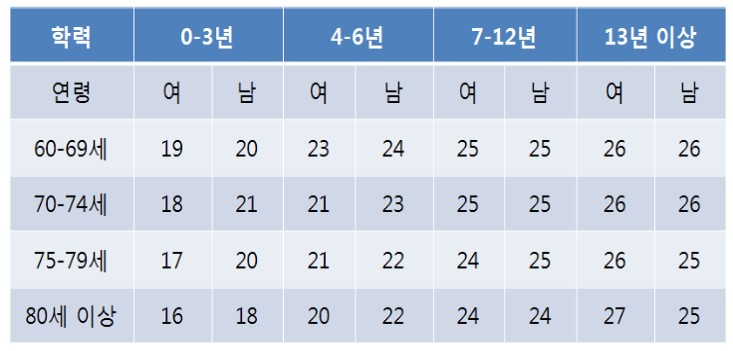

In [ ]:
## mmse_i
data['I1x1_y'] = data['I1x1_y'].replace([98,99], [np.nan,np.nan])    

data['mmse_i'] = np.where(  ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=18) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=23) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=22) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=22) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=13) & (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=19) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=18) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=17) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=16) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=23) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=27) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=13) & (data['RES_SEX_y']==0)), 1,0)

In [ ]:
## 국민기초생활 or 의료급여 수급자
data['J2_y'] = data['J2_y'].replace((1,2,3),(1,0,0))

In [ ]:
## 자산변수 - 제외
# tmp_list = ['J1b_1',
# 'J1b_3',
# 'J1b_4',
# 'J3b_3_3',
# 'J3b_3_7',
# 'J3b_3_8_r',
# 'J3b_3_13',
# 'J4',
# 'J6b_1',
# 'J6b_2',
# 'J6b_3',
# 'J6b_4',
# ]

# data[tmp_list] = np.where(data[tmp_list]==999998, np.nan, data[tmp_list]) 
# data[tmp_list] = np.where(data[tmp_list]==999999, np.nan, data[tmp_list]) 

In [ ]:
data['RES_MAR_y'] = data['RES_MAR_y'].replace([1,2,3,4,5,6], [0,1,0,0,0,0]) 

In [ ]:
## 수도권 거주
data['living_sudo'] = np.where((data['AREA_y'] == 11) | (data['AREA_y'] == 31),1,0  )

In [ ]:
tmp_list = ['B5_1_etc_1_y',]

data[tmp_list] = data[tmp_list].replace([999], [0])

In [ ]:
tmp_list = ['B4_1_etc_y',
'B5_1_etc_1_y',
'E1_2_y',
'E2_3_y']

data[tmp_list] = data[tmp_list].replace([98,99], [0, 0])

In [ ]:
tmp_list = ['E3_4_y',
            'H10_y',
            'H22_y',
]

data[tmp_list] = data[tmp_list].replace([9], [np.nan])

In [ ]:
data['E1_3_y'] = data['E1_3_y'].replace([99], [np.nan])
data['E2_1_y'] = data['E2_1_y'].replace([99], [np.nan])

In [ ]:
tmp_list = ['E1_5_1_y',
            'B9_1a_y',
]
data[tmp_list] = data[tmp_list].replace(9, 0)

In [ ]:
data['B3_y'] = data['B3_y'].replace([98,99], [0,0])
data['B13_1_y'] = data['B13_1_y'].replace(2, 0)
data['E2_2_1_y'] = data['E2_2_1_y'].replace([98,99], [0,0])
data['E1_3_1_y'] = data['E1_3_1_y'].replace([1,2,9], [1,0,0])
data['G1_1_y'] = data['G1_1_y'].replace([2,9], [0,0])
data['G2_1_y'] = data['G2_1_y'].replace([2,9], [0,0])
data['G6_y'] = data['G6_y'].replace([2,9], [0,0])
data['F4_y'] = data['F4_y'].replace([1,2,9], [1,0,0])
data['F12_y'] = data['F12_y'].replace([8,9], [np.nan,np.nan])
data['J1b_1_y'] = data['J1b_1_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])
data['J1b_3_y'] = data['J1b_3_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])
data['J1b_4_y'] = data['J1b_4_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])

### 여기까지

In [8]:
## column data type 통일
cols = data.columns[data.dtypes.eq('object')]
cols

data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
data['suicide'] = data['H25_y'].replace((1,2,9), (1,0,np.nan))

data = data[data['suicide'].notna()]

In [10]:
## cohab_mean_age
tmp_list = ['A4_2_1_y',
'A4_2_2_y',
'A4_2_3_y',
'A4_2_4_y',
'A4_2_5_y',
'A4_2_6_y',
'A4_2_7_y',
'A4_2_8_y',
'A4_2_9_y',
'A4_2_10_y']

data[tmp_list] = data[tmp_list].replace(999, np.NaN)
data['cohab_mean_age'] = data.loc[:,tmp_list].mean(axis=1)
data['num_of_cohab'] = data[tmp_list].count(axis=1)

In [11]:
## cohab_mean_edu_y
tmp_list = ['A6_2_1_y',
'A6_2_2_y',
'A6_2_3_y',
'A6_2_4_y',
'A6_2_5_y',
'A6_2_6_y',
'A6_2_7_y',
'A6_2_8_y',
'A6_2_9_y',
'A6_2_10_y']

data[tmp_list] = data[tmp_list].replace([98,99], [np.nan,np.nan])
data['cohab_mean_edu_y'] = data.loc[:,tmp_list].mean(axis=1)

In [12]:
## cohab_women
tmp_list = ['A3_1_y',
'A3_2_y',
'A3_3_y',
'A3_4_y',
'A3_5_y',
'A3_6_y',
'A3_7_y',
'A3_8_y',
'A3_9_y',
'A3_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (0,1,np.nan,np.nan))
data['cohab_women_p'] = data.loc[:,tmp_list].mean(axis=1)

In [13]:
# cohab_work_n
tmp_list = ['A7_1_y',
'A7_2_y',
'A7_3_y',
'A7_4_y',
'A7_5_y',
'A7_6_y',
'A7_7_y',
'A7_8_y',
'A7_9_y',
'A7_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (1,0,np.nan,np.nan))
data['cohab_work_n'] = data.loc[:,tmp_list].sum(axis=1)

In [14]:
## 평소 건강상태
data['B1_y'] = data['B1_y'].replace((1,2,3,4,5,8,9), (1,1,0,0,0,np.nan,np.nan))

In [15]:
## 만성질환 유무, 치료 여부
tmp_list = ['B2_2L_1_y',
'B2_2R_1_y',
'B2_2L_2_y',
'B2_2R_2_y',
'B2_2L_3_y',
'B2_2R_3_y',
'B2_2L_4_y',
'B2_2R_4_y',
'B2_2L_5_y',
'B2_2R_5_y',
'B2_2L_6_y',
'B2_2R_6_y',
'B2_2L_7_y',
'B2_2R_7_y',
'B2_2L_8_y',
'B2_2R_8_y',
'B2_2L_9_y',
'B2_2R_9_y',
'B2_2L_10_y',
'B2_2R_10_y',
'B2_2L_11_y',
'B2_2R_11_y',
'B2_2L_12_y',
'B2_2R_12_y',
'B2_2L_13_y',
'B2_2R_13_y',
'B2_2L_14_y',
'B2_2R_14_y',
'B2_2L_15_y',
'B2_2R_15_y',
'B2_2L_16_y',
'B2_2R_16_y',
'B2_2L_19_y',
'B2_2R_19_y',
'B2_2L_20_y',
'B2_2R_20_y',
'B2_2L_21_y',
'B2_2R_21_y',
'B2_2L_23_y',
'B2_2R_23_y',
'B2_2L_24_y',
'B2_2R_24_y',
'B2_2L_25_y',
'B2_2R_25_y',
'B2_2L_26_y',
'B2_2R_26_y',
'B2_2L_27_y',
'B2_2R_27_y',
'B2_2L_28_y',
'B2_2R_28_y',
'B2_2L_29_y',
'B2_2R_29_y',
'B2_2L_30_y',
'B2_2R_30_y',
'B2_2L_31_y',
'B2_2R_31_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [16]:
## gds_15
## 우울증 척도 - 단축형 노인우울척도(SGDS)를 사용하여 6점 이상을 중증도의 우울증상으로 정의함.
col_list = [  'B6_1_y',
  'B6_2_y',
  'B6_3_y',
  'B6_4_y',
  'B6_5_y',
  'B6_6_y',
  'B6_7_y',
  'B6_8_y',
  'B6_9_y',
  'B6_10_y',
  'B6_11_y',
  'B6_12_y',
  'B6_13_y',
  'B6_14_y',
  'B6_15_y']

data['B6_1_y'] = data['B6_1_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_2_y'] = data['B6_2_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_3_y'] = data['B6_3_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_4_y'] = data['B6_4_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_5_y'] = data['B6_5_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_6_y'] = data['B6_6_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_7_y'] = data['B6_7_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_8_y'] = data['B6_8_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_9_y'] = data['B6_9_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_10_y'] = data['B6_10_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_11_y'] = data['B6_11_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_12_y'] = data['B6_12_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_13_y'] = data['B6_13_y'].replace([1,2,8,9], [0,1,np.nan,np.nan]) ## 역코딩
data['B6_14_y'] = data['B6_14_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])
data['B6_15_y'] = data['B6_15_y'].replace([1,2,8,9], [1,0,np.nan,np.nan])

data['gds15'] = data.loc[:,col_list].sum(axis=1)
data['gds15_i'] = np.where(data['gds15']>=6, 1, 0)

In [17]:
## 현재 흡연 여부
data['B7_y'] = data['B7_y'].replace((1,2), (1,0))

In [18]:
## bmi
data['B10_1_y'] = data['B10_1_y'].replace(998, np.nan)
data['B10_3_y'] = data['B10_3_y'].replace(998, np.nan)
data['bmi'] = data['B10_1_y']/((data['B10_3_y']/100)**2)
# data = data.dropna() ## 18개 row 제거

In [19]:
## nutrition
tmp_list = [ 'B11_1_y',
 'B11_2_y',
 'B11_3_1_y',
 'B11_3_2_y',
 'B11_3_3_y',
 'B11_4_y',
 'B11_5_y',
 'B11_6_y',
 'B11_7_y',
 'B11_8_y',
 'B11_9_y',
 'B11_10_y',
]

data[tmp_list] = data[tmp_list].replace((1,2), (1,0))
data['nutrition'] = data.loc[:,tmp_list].sum(axis=1)

In [20]:
## welfare_fac
## 경로식당 이용 0-6
data['B12_1_y'] = data['B12_1_y'].replace((0,1,2,3,4,5,6), (0,1,1,1,0,0,0))

## 식사 배달 서비스 이용
data['B12_2_y'] = data['B12_2_y'].replace((0,1,2,3,4,5,6), (0,1,1,1,0,0,0))

data['welfare_fac'] = data['B12_1_y']+data['B12_2_y']
data['welfare_fac'] = data['welfare_fac'].replace([0,1,2], [0,1,1])

In [21]:
## hospital_no
## 병의원 진료 못 받은 경험
data['B14_1_y'] = data['B14_1_y'].replace((1,2,8,9), (1,0,0,0))

## 치과 진료 못 받은 경험
data['B14_2_y'] = data['B14_2_y'].replace((1,2,8,9), (1,0,0,0))

data['hospital_no'] = data['B14_1_y']+data['B14_2_y']
data['hospital_no'] = data['hospital_no'].replace([0,1,2], [0,1,1])

In [22]:
## assistive_device
data['C1_1_y'] = data['C1_1_y'].replace((1,2,8,9), (1,0,0,0))
data['C2_1_y'] = data['C2_1_y'].replace((1,2,8,9), (1,0,0,0))
data['C3_1_y'] = data['C3_1_y'].replace((1,2,8,9), (1,0,0,0))

data['assistive_device'] = data['C1_1_y']+data['C2_1_y']+data['C3_1_y']
data['assistive_device'] = data['assistive_device'].replace([0,1,2,3], [0,1,1,1])

In [23]:
##일상생활 불편함
data['C1_2_y'] = data['C1_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))
data['C2_2_y'] = data['C2_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))
data['C3_2_y'] = data['C3_2_y'].replace((1,2,3,8,9), (0,1,1,0,0))

In [24]:
# ## 근력상태
data['C4_y'] = data['C4_y'].replace((1,2,3,8,9), (1,0,0,0,0))

In [25]:
## performance - 역코딩
tmp_list = [ 'C5_1_y','C5_2_y','C5_3_y','C5_4_y','C5_5_y','C5_6_y']

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5), (4,3,2,1,np.nan))
data['performance'] = data.loc[:,col_list].sum(axis=1)/6

In [26]:
## adl & iadl
tmp_list = [ 'C6_1_y','C6_2_y','C6_3_y','C6_4_y','C6_5_y','C6_6_y','C6_7_y']
data['adl'] = data.loc[:,tmp_list].sum(axis=1)

tmp_list = [ 'C7_1_1_y','C7_1_2_y','C7_1_3_y','C7_1_4_y','C7_1_5_y','C7_1_6_y','C7_1_7_y','C7_2_8_y','C7_2_9_y','C7_2_10_y']
data['iadl'] = data.loc[:,tmp_list].sum(axis=1)

In [27]:
## 일상생활수행 도움받음 여부 및 도움 주체
## 장애 여부: C8_y
tmp_list = ['C8_y',
'C8_1_1_y',
'C8_1_2_y',
'C8_1_3_y',
'C8_1_4_y',
'C8_1_5_y',
'C8_1_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

data['C8_1_1_y'] = np.where(data['C8_1_1_y'] + data['C8_1_2_y'] >= 1, 1, 0)

In [28]:
# 노인장기요양보험 등급 신청 경험 유무
data['C9_y'] = data['C9_y'].replace((1,2), (1,0))

# 지난 1년 간 여행 여부 + # 지난 1년간 여가문화활동(TV시청, 라디오 청취 제외)
data['D2_y'] = data['D2_y'].replace((1,2,9), (1,0,0))
data['D3_y'] = data['D3_y'].replace((1,2,9), (1,0,0))

data['D2_y'] = np.where(data['D2_y'] + data['D3_y'] >= 1, 1, 0)

# 평생교육 참여 빈도
data['D5_3_1_y'] = data['D5_3_1_y'].replace((1,2,3,4,5,6,9,999), (16,10,4,2,1,0,0,0))

# 동호회(클럽활동)_참여 빈도
data['D6_1_1_y'] = data['D6_1_1_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 친목단체_참여 빈도
data['D6_1_2_y'] = data['D6_1_2_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 정치사회단체_참여 빈도
data['D6_1_3_y'] = data['D6_1_3_y'].replace((1,2,3,4,5,6,9), (16,10,4,2,1,0,0))

# 자원봉사활동 빈도
data['D7_3_1_y'] = data['D7_3_1_y'].replace((1,2,3,4,5,6,9,999), (16,10,4,2,1,0,0,0))

# 종교 종류
data['D8_y'] = data['D8_y'].replace((9), (np.nan))

In [29]:
# female
data['RES_SEX_y'] = data['RES_SEX_y'].replace((1,2), (0,1))

In [30]:
## future_activity
tmp_list = ['D10_1_y',
'D10_2_y',
'D10_3_y',
'D10_4_y',
'D10_5_y',
'D10_6_y',
]

data[tmp_list] = data[tmp_list].replace([1,2,3,4,5,8,9], [1,1,1,0,0,0,0])
data['future_activity'] = data.loc[:,tmp_list].mean(axis=1)

In [31]:
## fac_use_public
tmp_list = ['D11_2_1_y',
'D11_2_2_y',
]

data[tmp_list] = data[tmp_list].replace([8,9,99], [0,0,0])
data['fac_use_public'] = data.loc[:,tmp_list].mean(axis=1)

In [32]:
## future_fac_use
tmp_list = ['D11_4_1_y',
'D11_4_2_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,8,9), (1,0,0,0))
data['future_fac_use'] = data.loc[:,tmp_list].mean(axis=1)

In [33]:
## 현재 경제활동 여부
data['E1_y'] = data['E1_y'].replace((1,2,3,9), (1,0,0,0))

In [34]:
## 현재 일_정부지원일자리 여부
data['gov_sup_work'] = data['E1_3_1_y'].replace((1,2,9), (1,0,0))

In [35]:
## 현재 일 만족 여부
data['E1_9_y'] = data['E1_9_y'].replace([1,2,3,4,5,9], [1,1,0,0,0,0]) 

In [36]:
## 향후 근로희망 여부
data['E3_y'] = data['E3_y'].replace([1,2,3,4,9], [0,1,1,1,0]) 

In [37]:
## 노인일자리 및 사회활동지원사업 참여 경험 유무
data['E4_y'] = data['E4_y'].replace([1,2,3,4,9], [1,1,0,0,0]) 

In [38]:
## 향후 노인일자리 및 사회활동지원사업 참여 의향
data['E5_y'] = data['E5_y'].replace([1,2,9], [1,0,0]) 

In [39]:
# num_child_out
tmp_list = ['F1_1_1_y',
'F5_1_etc_y',
]

data[tmp_list] = data[tmp_list].replace([98,99], [0,0])
data['num_child_out'] = data.loc[:,tmp_list].sum(axis=1)

In [40]:
# meet_child_out - 역코딩
tmp_list = ['F2_y',
'F5_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['meet_child_out'] = data.loc[:,tmp_list].mean(axis=1)

In [41]:
# call_child_out
tmp_list = ['F2_1_y',
'F5_2_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['call_child_out'] = data.loc[:,tmp_list].mean(axis=1)

In [42]:
## 비동거 생존자녀 중 가장 많이 접촉한 자녀_거리
data['F3_1_y'] = data['F3_1_y'].replace((1,2,3,4,5,6,7,8,9,98,99), (1,1,0,0,0,0,0,0,0,0,0))

In [43]:
## 배우자 건강상태
data['F6_y'] = data['F6_y'].replace((1,2,3,4,5,8,9),(1,1,0,0,0,0,0))

In [44]:
## family_contact - 역코딩
tmp_list = ['F14_y',
'F14_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['family_contact'] = data.loc[:,tmp_list].mean(axis=1)

In [45]:
## friends_contact - 역코딩
tmp_list = ['F15_y',
'F15_1_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,5,6,7,8,9), (7,6,5,4,3,2,1,0,0))
data['friends_contact'] = data.loc[:,tmp_list].mean(axis=1)

In [46]:
## num_alter
data['F16_1_y'] = data['F16_1_y'].replace([98,99],[0,0])
data['F16_2_y'] = data['F16_2_y'].replace([98,99],[0,0])

data['num_alter'] = data['F16_1_y'] + data['F16_2_y']

In [47]:
## 동거 자녀 도움 종류
tmp_list = ['G1_3_1_y',
'G1_3_2_y',
'G1_3_3_y',
'G1_3_4_y',
'G1_3_5_y',
'G1_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

In [48]:
## 동거 자녀 현금 도움 종류
tmp_list = ['G1_4_7_y',
'G1_4_8_y',
'G1_4_9_y',
'G1_4_10_y',
'G1_4_11_y',
'G1_4_12_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [49]:
## 비동거 자녀 도움 종류
tmp_list = ['G2_3_1_y',
'G2_3_2_y',
'G2_3_3_y',
'G2_3_4_y',
'G2_3_5_y',
'G2_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

## 비동거 자녀 현금 도움 종류
tmp_list = ['G2_4_7_y',
'G2_4_8_y',
'G2_4_9_y',
'G2_4_10_y',
'G2_4_11_y',
'G2_4_12_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

In [50]:
## 배우자 도움 종류
tmp_list = ['G4_3_1_y',
'G4_3_2_y',
'G4_3_3_y',
'G4_3_4_y',
'G4_3_5_y',
'G4_3_6_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,3,4,9), (1,1,0,0,0))

In [51]:
data['cohabchild_instrumental_support'] = data['G1_3_3_y'] + data['G1_3_5_y']
data['cohabchild_instrumental_support'] = data['cohabchild_instrumental_support'].replace((0,1,2), (0,1,1))

data['cohabchild_instrumental_giving'] = data['G1_3_4_y'] + data['G1_3_4_y']
data['cohabchild_instrumental_giving'] = data['cohabchild_instrumental_giving'].replace((0,1,2), (0,1,1))

data['cohabchild_financial_support'] = data['G1_4_8_y'] + data['G1_4_10_y'] + data['G1_4_12_y']
data['cohabchild_financial_support'] = data['cohabchild_financial_support'].replace((0,1,2,3), (0,1,1,1))

data['cohabchild_financial_giving'] = data['G1_4_8_y'] + data['G1_4_10_y'] + data['G1_4_12_y']
data['cohabchild_financial_giving'] = data['cohabchild_financial_giving'].replace((0,1,2,3), (0,1,1,1))


data['seperatedchild_instrumental_support'] = data['G2_3_3_y'] + data['G2_3_5_y']
data['seperatedchild_instrumental_support'] = data['seperatedchild_instrumental_support'].replace((0,1,2), (0,1,1))

data['seperatedchild_instrumental_giving'] = data['G2_3_4_y'] + data['G2_3_6_y']
data['seperatedchild_instrumental_giving'] = data['seperatedchild_instrumental_giving'].replace((0,1,2), (0,1,1))

data['seperatedchild_financial_support'] = data['G2_4_7_y'] + data['G2_4_9_y'] + data['G2_4_11_y']
data['seperatedchild_financial_support'] = data['seperatedchild_financial_support'].replace((0,1,2,3), (0,1,1,1))

data['seperatedchild_financial_giving'] = data['G2_4_8_y'] + data['G2_4_10_y'] + data['G2_4_12_y']
data['seperatedchild_financial_giving'] = data['seperatedchild_financial_giving'].replace((0,1,2,3), (0,1,1,1))

data['spouse_instrumental_support'] = data['G4_3_3_y'] + data['G4_3_5_y']
data['spouse_instrumental_support'] = data['spouse_instrumental_support'].replace((0,1,2), (0,1,1))

data['spouse_instrumental_giving'] = data['G4_3_4_y'] + data['G4_3_6_y']
data['spouse_instrumental_giving'] = data['spouse_instrumental_giving'].replace((0,1,2), (0,1,1))

In [52]:
# ## 문화시설까지의 평균 거리  점수
col_list = ['H3_1_y','H3_2_y','H3_3_y','H3_4_y','H3_5_y','H3_6_y']

data[col_list] = data[col_list].replace(9, 5)

data['fac_dist'] = data.loc[:,col_list].sum(axis=1)
data['fac_dist'] = data['fac_dist']/6

In [53]:
## 현재 운전 여부
data['H11_y'] = data['H11_y'].replace([1,2,3,9], [1,0,0,0]) 

In [54]:
# 낙상_지난 1년 간 낙상 횟수
data['H12_1_etc_y'] = data['H12_1_etc_y'].replace([98,99],[0,0])

In [55]:
## criminal
tmp_list = ['H13_1_y',
'H13_2_y',
'H13_3_y',
'H13_4_y',
]

data[tmp_list] = data[tmp_list].replace((1,2,9), (1,0,0))

data['criminal'] = data.loc[:,tmp_list].sum(axis=1)
data['criminal'] = np.where( data['criminal']==0, 0, 1)

In [56]:
## 타인으로부터 피해 여부
tmp_list = ['H14_1_1_y',
'H14_1_3_y',
'H14_1_4_y',
'H14_1_5_y',
'H14_1_6_y']

data[tmp_list] = data[tmp_list].replace([1,2,9], [1,0,0]) 

In [57]:
## 만족도 종류
tmp_list = ['H16_1_y',
'H16_2_y',
'H16_3_y',
'H16_4_y',
'H16_5_y',
'H16_6_y',
]

data[tmp_list] = data[tmp_list].replace([1,2,3,4,5,8,9], [1,1,0,0,0,0,0]) 

In [58]:
## 만족도 전반
tmp_list = ['H16_1_y',
'H16_2_y',
'H16_3_y',
'H16_4_y',
'H16_5_y',
'H16_6_y',
]

data['H16_7_y'] = data.loc[:,tmp_list].sum(axis=1)/6

In [59]:
# ## 차별경험 

data['discrimination'] = data['H19_1_y'].replace([1,2,9], [1,0,0]) 

In [60]:
## 연명의료 찬성도
data['H21_y'] = data['H21_y'].replace([1,2,3,4,5,8,9], [1,1,0,0,0,0,0]) ## 역코딩

In [61]:
## death_prep (하나라도 있으면 1)

tmp_list = [ 'H23_1_y','H23_3_y','H23_4_y','H23_7_y','H23_8_y']
data[tmp_list] = data[tmp_list].replace([1,2,9], [1,0,0])

data['death_prep'] = data.loc[:,tmp_list].sum(axis=1)
data['death_prep'] = np.where(data['death_prep']>=1, 1, 0)

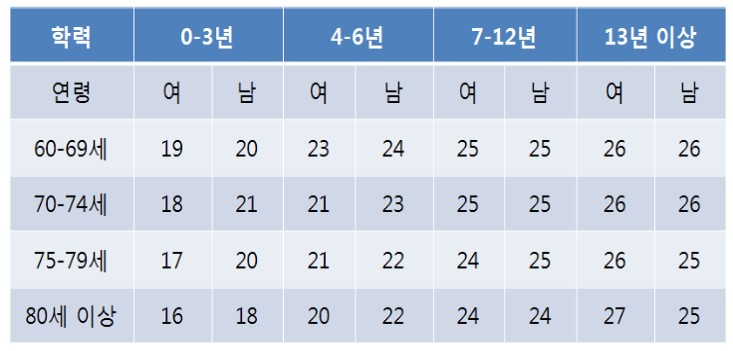

In [62]:
## mmse_i
data['I1x1_y'] = data['I1x1_y'].replace([98,99], [np.nan,np.nan])    

data['mmse_i'] = np.where(  ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=18) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=23) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=22) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=22) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=13) & (data['RES_SEX_y']==1)) | 
                            ((data['I1x1_y']>=19) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=18) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=17) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=16) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=0) & (data['RES_EDU2_y']<=3) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=23) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=21) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=20) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=4) & (data['RES_EDU2_y']<=6) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=25) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=24) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=7) & (data['RES_EDU2_y']<=12) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=60) & (data['RES_AGE_y']<70) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=70) & (data['RES_AGE_y']<75) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=26) & (data['RES_AGE_y']>=75) & (data['RES_AGE_y']<80) & (data['RES_EDU2_y']>=13) &  (data['RES_SEX_y']==0)) | 
                            ((data['I1x1_y']>=27) & (data['RES_AGE_y']>=80) & (data['RES_EDU2_y']>=13) & (data['RES_SEX_y']==0)), 1,0)

In [63]:
## 국민기초생활 or 의료급여 수급자
data['J2_y'] = data['J2_y'].replace((1,2,3),(1,0,0))

In [64]:
data['J3b_3_8_r_y'] = data['J3b_3_8_y'] + data['J3b_3_9_y']

In [65]:
## 자산변수
tmp_list = ['J1b_1_y',
'J1b_3_y',
'J1b_4_y',
'J3b_1_13_y',
'J3b_3_3_y',
'J3b_3_7_y',
'J3b_3_8_r_y',
'J3b_3_13_y',
'J4_y',
'J6b_1_y',
'J6b_2_y',
'J6b_3_y',
'J6b_4_y',
]

data['J1b_1_y'] = np.where((data['J1b_1_y']==9998)|(data['J1b_1_y']==9999), np.nan, data['J1b_1_y']) 
data['J1b_3_y'] = np.where((data['J1b_3_y']==9998)|(data['J1b_3_y']==9999), np.nan, data['J1b_3_y']) 
data['J1b_4_y'] = np.where((data['J1b_4_y']==9998)|(data['J1b_4_y']==9999), np.nan, data['J1b_4_y']) 

data[tmp_list] = np.where(data[tmp_list]==999998, np.nan, data[tmp_list]) 
data[tmp_list] = np.where(data[tmp_list]==999999, np.nan, data[tmp_list]) 

In [66]:
data['finantial_asset'] = data['J6b_1_y'] + data['J6b_2_y'] + data['J6b_3_y']

In [67]:
data['RES_MAR_y'] = data['RES_MAR_y'].replace([1,2,3,4,5,6], [0,1,0,0,0,0]) 

In [68]:
## 수도권 거주
data['living_sudo'] = np.where((data['AREA_y'] == 11) | (data['AREA_y'] == 31),1,0  )

In [69]:
tmp_list = ['B4_1_etc_y',
'B5_1_etc_1_y',]

data[tmp_list] = data[tmp_list].replace([98,99], [0, 0])

In [70]:
tmp_list = ['E3_4_y',
            'H10_y',
            'H22_y',
]

data[tmp_list] = data[tmp_list].replace([9], [np.nan])

In [71]:
data['E1_2_y'] = data['E1_2_y'].replace([8,9,99], [np.nan,np.nan,np.nan])
data['E1_3_y'] = data['E1_3_y'].replace([99], [np.nan])
data['E2_1_y'] = data['E2_1_y'].replace([7,8,9,99], [np.nan,np.nan,np.nan,np.nan])

In [72]:
tmp_list = ['E1_5_1_y',
            'B9_1a_y',
]
data[tmp_list] = data[tmp_list].replace(9, 0)

In [73]:
data['B3_y'] = data['B3_y'].replace([98,99], [0,0])
data['B13_1_y'] = data['B13_1_y'].replace(2, 0)
data['E2_2_1_y'] = data['E2_2_1_y'].replace([98,99], [0,0])
data['E1_3_1_y'] = data['E1_3_1_y'].replace([1,2,9], [1,0,0])
data['G1_1_y'] = data['G1_1_y'].replace([2,9], [0,0])
data['G2_1_y'] = data['G2_1_y'].replace([2,9], [0,0])
data['G6_y'] = data['G6_y'].replace([2,9], [0,0])
data['F4_y'] = data['F4_y'].replace([1,2,9], [1,0,0])
data['F12_y'] = data['F12_y'].replace([8,9], [np.nan,np.nan])
data['J1b_1_y'] = data['J1b_1_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])
data['J1b_3_y'] = data['J1b_3_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])
data['J1b_4_y'] = data['J1b_4_y'].replace([9998,9999,998,999], [np.nan,np.nan,np.nan,np.nan])

In [75]:
data['E1_5_1_y'] = data['E1_5_1_y'].replace(9,0)
data['E2_2_1_y'] = data['E2_2_1_y'].replace([98, 99], [0,0])
data['E3_4_y'] = data['E3_4_y'].replace([0,1,2,3,4,5,6,7,9, np.nan], [0,1,1,1,1,1,1,1,0,0])
data['F4_y'] = data['F4_y'].replace([2,9], [0,0])
data['G6_y'] = data['G6_y'].replace(2,0)
data['financial_asset'] = data['J6b_1_y'] + data['J6b_2_y'] + data['J6b_3_y']

In [77]:
## 쓰는 변수만 추리기
## 쓰는 변수만 추리기
con_list = ['S5_1_y',
'S5_2_y',
'S6_1_y',
'cohab_mean_age',
'cohab_mean_edu_y',
'cohab_women_p',
'cohab_work_n',
'B2_3_y',
'B3_y',
'B4_1_etc_y',
'B5_1_etc_1_y',
'B8_y',
'B9_1a_y',
'bmi',
'nutrition',
'adl',
'D5_3_1_y',
'D6_1_1_y',
'D6_1_2_y',
'D6_1_3_y',
'D7_3_1_y',
'fac_use_public',
'E1_5_1_y',
'E2_2_1_y',
'num_child_out',
'meet_child_out',
'call_child_out',
'family_contact',
'friends_contact',
'num_alter',
'fac_dist',
'H12_1_etc_y',
'J1b_1_y',
'J1b_3_y',
'J1b_4_y',
'J3b_1_13_y',
'J3b_3_13_y',
'financial_asset',
'J6b_4_y',
'RES_AGE_y',
'RES_EDU2_y',
]
cat_list = ['A10_2_y',
'D8_y',
'E1_2_y',
'E1_3_y',
'E1_3_1_y',
'E2_1_y',
'E2_3_y',
'F12_y',
'Q1_y',]
bin_list = ['B1_y',
'B2_2R_1_y',
'B2_2R_2_y',
'B2_2R_3_y',
'B2_2R_4_y',
'B2_2R_5_y',
'B2_2R_6_y',
'B2_2R_7_y',
'B2_2R_8_y',
'B2_2R_9_y',
'B2_2R_10_y',
'B2_2R_11_y',
'B2_2R_12_y',
'B2_2R_13_y',
'B2_2R_14_y',
'B2_2R_15_y',
'B2_2R_16_y',
'B2_2R_19_y',
'B2_2R_20_y',
'B2_2R_21_y',
'B2_2R_23_y',
'B2_2R_24_y',
'B2_2R_25_y',
'B2_2R_26_y',
'B2_2R_27_y',
'B2_2R_28_y',
'B2_2R_29_y',
'B2_2R_30_y',
'B2_2R_31_y',
'gds15_i',
'B7_y',
'welfare_fac',
'hospital_no',
'assistive_device',
'C1_2_y',
'C2_2_y',
'C3_2_y',
'C8_y',
'D2_y',
'E1_y',
'E1_9_y',
'E3_4_y',
'E4_y',
'F4_y',
'F6_y',
'G1_3_1_y',
'G1_3_2_y',
'cohabchild_instrumental_support',
'cohabchild_instrumental_giving',
'cohabchild_financial_support',
'cohabchild_financial_giving',
'G2_3_1_y',
'G2_3_2_y',
'seperatedchild_instrumental_support',
'seperatedchild_instrumental_giving',
'seperatedchild_financial_support',
'seperatedchild_financial_giving',
'G4_3_1_y',
'G4_3_2_y',
'spouse_instrumental_support',
'spouse_instrumental_giving',
'G6_y',
'H11_y',
'criminal',
'H14_1_1_y',
'H14_1_3_y',
'H14_1_4_y',
'H14_1_5_y',
'H14_1_6_y',
'H16_1_y',
'H16_2_y',
'H16_3_y',
'H16_4_y',
'H16_5_y',
'H16_6_y',
'discrimination',
'death_prep',
'suicide',
'mmse_i',
'J2_y',
'RES_SEX_y',
'RES_MAR_y',
]

final_data = data[con_list+cat_list+bin_list]

check binary

In [79]:
for column in final_data.loc[:,bin_list].columns:
    display(pd.crosstab(index=final_data[column], columns='observations'))

col_0,observations
B1_y,
0,4980
1,4940


col_0,observations
B2_2R_1_y,
0,4284
1,5636


col_0,observations
B2_2R_2_y,
0,9545
1,375


col_0,observations
B2_2R_3_y,
0,8269
1,1651


col_0,observations
B2_2R_4_y,
0,9481
1,439


col_0,observations
B2_2R_5_y,
0,9473
1,447


col_0,observations
B2_2R_6_y,
0,7570
1,2350


col_0,observations
B2_2R_7_y,
0,9622
1,298


col_0,observations
B2_2R_8_y,
0,8468
1,1452


col_0,observations
B2_2R_9_y,
0,9163
1,757


col_0,observations
B2_2R_10_y,
0,9120
1,800


col_0,observations
B2_2R_11_y,
0,9805
1,115


col_0,observations
B2_2R_12_y,
0,9809
1,111


col_0,observations
B2_2R_13_y,
0,9755
1,165


col_0,observations
B2_2R_14_y,
0,9910
1,10


col_0,observations
B2_2R_15_y,
0,9800
1,120


col_0,observations
B2_2R_16_y,
0,9783
1,137


col_0,observations
B2_2R_19_y,
0,9582
1,338


col_0,observations
B2_2R_20_y,
0,9848
1,72


col_0,observations
B2_2R_21_y,
0,9865
1,55


col_0,observations
B2_2R_23_y,
0,9864
1,56


col_0,observations
B2_2R_24_y,
0,9776
1,144


col_0,observations
B2_2R_25_y,
0,9513
1,407


col_0,observations
B2_2R_26_y,
0,9891
1,29


col_0,observations
B2_2R_27_y,
0,9890
1,30


col_0,observations
B2_2R_28_y,
0,9829
1,91


col_0,observations
B2_2R_29_y,
0,9595
1,325


col_0,observations
B2_2R_30_y,
0,9771
1,149


col_0,observations
B2_2R_31_y,
0,9809
1,111


col_0,observations
gds15_i,
0,7658
1,2262


col_0,observations
B7_y,
0,8831
1,1089


col_0,observations
welfare_fac,
0,9001
1,919


col_0,observations
hospital_no,
0,9478
1,442


col_0,observations
assistive_device,
0,3197
1,6723


col_0,observations
C1_2_y,
0,6634
1,3286


col_0,observations
C2_2_y,
0,7623
1,2297


col_0,observations
C3_2_y,
0,6169
1,3751


col_0,observations
C8_y,
0,9422
1,498


col_0,observations
D2_y,
0,1684
1,8236


col_0,observations
E1_y,
0,6147
1,3773


col_0,observations
E1_9_y,
0,7225
1,2695


col_0,observations
E3_4_y,
0.0,8710
1.0,1210


col_0,observations
E4_y,
0,8580
1,1340


col_0,observations
F4_y,
0,9417
1,503


col_0,observations
F6_y,
0,6467
1,3453


col_0,observations
G1_3_1_y,
0,8677
1,1243


col_0,observations
G1_3_2_y,
0,8836
1,1084


col_0,observations
cohabchild_instrumental_support,
0,8666
1,1254


col_0,observations
cohabchild_instrumental_giving,
0,8765
1,1155


col_0,observations
cohabchild_financial_support,
0,9128
1,792


col_0,observations
cohabchild_financial_giving,
0,9128
1,792


col_0,observations
G2_3_1_y,
0,3540
1,6380


col_0,observations
G2_3_2_y,
0,4803
1,5117


col_0,observations
seperatedchild_instrumental_support,
0,5900
1,4020


col_0,observations
seperatedchild_instrumental_giving,
0,7898
1,2022


col_0,observations
seperatedchild_financial_support,
0,1188
1,8732


col_0,observations
seperatedchild_financial_giving,
0,5474
1,4446


col_0,observations
G4_3_1_y,
0,4892
1,5028


col_0,observations
G4_3_2_y,
0,4936
1,4984


col_0,observations
spouse_instrumental_support,
0,4934
1,4986


col_0,observations
spouse_instrumental_giving,
0,4962
1,4958


col_0,observations
G6_y,
0,9097
1,823


col_0,observations
H11_y,
0,7758
1,2162


col_0,observations
criminal,
0,9652
1,268


col_0,observations
H14_1_1_y,
0,9838
1,82


col_0,observations
H14_1_3_y,
0,9476
1,444


col_0,observations
H14_1_4_y,
0,9889
1,31


col_0,observations
H14_1_5_y,
0,9891
1,29


col_0,observations
H14_1_6_y,
0,9894
1,26


col_0,observations
H16_1_y,
0,4708
1,5212


col_0,observations
H16_2_y,
0,6028
1,3892


col_0,observations
H16_3_y,
0,5638
1,4282


col_0,observations
H16_4_y,
0,2866
1,7054


col_0,observations
H16_5_y,
0,5526
1,4394


col_0,observations
H16_6_y,
0,3992
1,5928


col_0,observations
discrimination,
0,7919
1,2001


col_0,observations
death_prep,
0,3969
1,5951


col_0,observations
suicide,
0.0,9733
1.0,187


col_0,observations
mmse_i,
0,2833
1,7087


col_0,observations
J2_y,
0,9411
1,509


col_0,observations
RES_SEX_y,
0,3971
1,5949


col_0,observations
RES_MAR_y,
0,4071
1,5849


check categorical

In [80]:
for column in final_data.loc[:,cat_list].columns:
    display(pd.crosstab(index=final_data[column], columns='observations'))


col_0,observations
A10_2_y,
0,9757
1,39
2,124


col_0,observations
D8_y,
0,4070
1,2444
2,2252
3,1055
4,68
5,19
6,12


col_0,observations
E1_2_y,
1.0,914
2.0,382
3.0,590
4.0,179
5.0,106
6.0,175
7.0,97
10.0,27
11.0,84


col_0,observations
E1_3_y,
1,686
2,807
3,491
4,151
5,1337
6,301
9,6147


col_0,observations
E1_3_1_y,
0,9098
1,822


col_0,observations
E2_1_y,
1.0,3022
2.0,779
3.0,624
4.0,450
5.0,2777
6.0,914


col_0,observations
E2_3_y,
1,1434
2,2360
3,1063
4,385
5,467
6,159
7,295
8,28
9,3729


col_0,observations
F12_y,
1.0,627
2.0,288
3.0,457
4.0,215


col_0,observations
Q1_y,
1,3931
2,4700
3,1205
4,84


check continuous

In [81]:
final_data.loc[:,con_list].describe().T

,count,mean,std,min,25%,50%,75%,max
S5_1_y,9920.0,1.859778,0.801120,1.000000,1.000000,2.000000,2.000000,10.0000
S5_2_y,9920.0,1.538810,0.512084,1.000000,1.000000,2.000000,2.000000,4.0000
S6_1_y,9920.0,0.171673,0.408677,0.000000,0.000000,0.000000,0.000000,3.0000
cohab_mean_age,9920.0,70.523376,9.202755,30.000000,66.500000,70.500000,77.000000,97.0000
cohab_mean_edu_y,9920.0,8.191633,3.855013,0.000000,6.000000,9.000000,12.000000,32.0000
cohab_women_p,9920.0,0.599272,0.279505,0.000000,0.500000,0.500000,1.000000,1.0000
cohab_work_n,9920.0,0.756653,0.831781,0.000000,0.000000,1.000000,1.000000,5.0000
B2_3_y,9920.0,1.835181,1.466895,0.000000,1.000000,2.000000,3.000000,17.0000
B3_y,9920.0,1.771673,1.530805,0.000000,1.000000,2.000000,3.000000,30.0000
B4_1_etc_y,9920.0,1.506149,2.344845,0.000000,0.000000,1.000000,2.000000,30.0000


In [78]:
final_data.to_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK_semi.csv')

## min-max normalization for continuous var

In [82]:
final_data[cat_list] = final_data[cat_list].fillna(99)

for column in final_data.loc[:,cat_list].columns:
  final_data[column] = final_data[column].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
data['H22_y'] = data['H22_y'].replace((5,6),(6,7))

In [84]:
len(final_data.dropna())
a=final_data.isna().sum()
a[a!=0]

bmi                 15
financial_asset    102
dtype: int64

In [ ]:
len(final_data)

9920

In [85]:
final_data.to_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK_preprocessed.csv')